In [2]:
import numpy as np                                #Required Libraries Added
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  #File Included in Page

In [5]:
df.head(3)  #Shows the first 3 rows of the data set

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBELİADA,40142,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420


In [6]:
df.tail(3)   #Shows the last 3 rows of the data set

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
956,ZEYTİNBURNU,VELİEFENDİ,40836,39,80,309,530,66,38,175,317,1,1,2,3400
957,ZEYTİNBURNU,YENİDOĞAN,40833,17,33,135,234,24,13,63,114,0,0,1,1715
958,ZEYTİNBURNU,YEŞİLTEPE,40835,26,52,211,374,45,25,118,216,0,0,1,4250


In [7]:
df.info()   #Shows general information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ilce_adi                      959 non-null    object
 1   mahalle_adi                   959 non-null    object
 2   mahalle_koy_uavt              959 non-null    int64 
 3   cok_agir_hasarli_bina_sayisi  959 non-null    int64 
 4   agir_hasarli_bina_sayisi      959 non-null    int64 
 5   orta_hasarli_bina_sayisi      959 non-null    int64 
 6   hafif_hasarli_bina_sayisi     959 non-null    int64 
 7   can_kaybi_sayisi              959 non-null    int64 
 8   agir_yarali_sayisi            959 non-null    int64 
 9   hastanede_tedavi_sayisi       959 non-null    int64 
 10  hafif_yarali_sayisi           959 non-null    int64 
 11  dogalgaz_boru_hasari          959 non-null    int64 
 12  icme_suyu_boru_hasari         959 non-null    int64 
 13  atik_su_boru_hasari 

In [8]:
df.shape  #Returns the dimensions of the data set (number of rows and columns)

(959, 15)

In [9]:
df.columns  #Lists the column names in the data set

Index(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt',
       'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi',
       'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi',
       'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi',
       'hafif_yarali_sayisi', 'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari',
       'atik_su_boru_hasari', 'gecici_barinma'],
      dtype='object')

In [10]:
df.describe().T  #Shows statistical summary of numeric columns by transposing

,count,mean,std,min,25%,50%,75%,max
mahalle_koy_uavt,959.0,70155.974974,57059.328052,16634.0,40371.5,40677.0,40949.5,192001.0
cok_agir_hasarli_bina_sayisi,959.0,14.072993,21.630965,0.0,1.0,5.0,17.0,201.0
agir_hasarli_bina_sayisi,959.0,35.801877,44.955700,0.0,6.0,20.0,48.0,313.0
orta_hasarli_bina_sayisi,959.0,152.775808,162.244740,0.0,39.0,100.0,214.5,1565.0
hafif_hasarli_bina_sayisi,959.0,314.415016,268.199687,2.0,112.5,251.0,440.0,2452.0
can_kaybi_sayisi,959.0,14.749739,28.838763,0.0,0.0,3.0,13.0,230.0
agir_yarali_sayisi,959.0,8.435871,16.524790,0.0,0.0,1.0,8.0,122.0
hastanede_tedavi_sayisi,959.0,41.330553,75.469817,0.0,1.0,11.0,39.0,592.0
hafif_yarali_sayisi,959.0,78.456726,134.451200,0.0,4.0,26.0,78.5,1028.0
dogalgaz_boru_hasari,959.0,0.371220,0.604304,0.0,0.0,0.0,1.0,4.0


In [11]:
df.isnull().any()  #Checks which columns have empty values

,0
ilce_adi,False
mahalle_adi,False
mahalle_koy_uavt,False
cok_agir_hasarli_bina_sayisi,False
agir_hasarli_bina_sayisi,False
orta_hasarli_bina_sayisi,False
hafif_hasarli_bina_sayisi,False
can_kaybi_sayisi,False
agir_yarali_sayisi,False
hastanede_tedavi_sayisi,False


In [12]:
df["ilce_adi"].value_counts()   #Shows the frequencies of the values in the 'ilce_adi' column

,count
ilce_adi,
ŞİLE,62
FATİH,57
BEYKOZ,45
BEYOĞLU,45
ESENYURT,43
ÇATALCA,39
SARIYER,38
ARNAVUTKÖY,38
PENDİK,36


In [13]:
df.groupby("ilce_adi").agg({"can_kaybi_sayisi":"sum"})  #Calculates the total number of casualties for each district

,can_kaybi_sayisi
ilce_adi,
ADALAR,76
ARNAVUTKÖY,0
ATAŞEHİR,89
AVCILAR,465
BAHÇELİEVLER,1633
BAKIRKÖY,1046
BAYRAMPAŞA,520
BAĞCILAR,1179
BAŞAKŞEHİR,71


In [14]:
df.groupby(["ilce_adi", "mahalle_adi"]).agg({"can_kaybi_sayisi":"sum"})  #Calculates the total number of casualties for each district and neighborhood

can_kaybi_sayisi
ilce_adi mahalle_adi                  
ADALAR   BURGAZADA                   8
         HEYBELİADA                 25
         KINALIADA                   5
         MADEN                      22
         NİZAM                      16
...                                ...
ŞİŞLİ    PAŞA                        4
         TEŞVİKİYE                   2
         YAYLA                       3
         İNÖNÜ                       1
         İZZET PAŞA                  2

[959 rows x 1 columns]

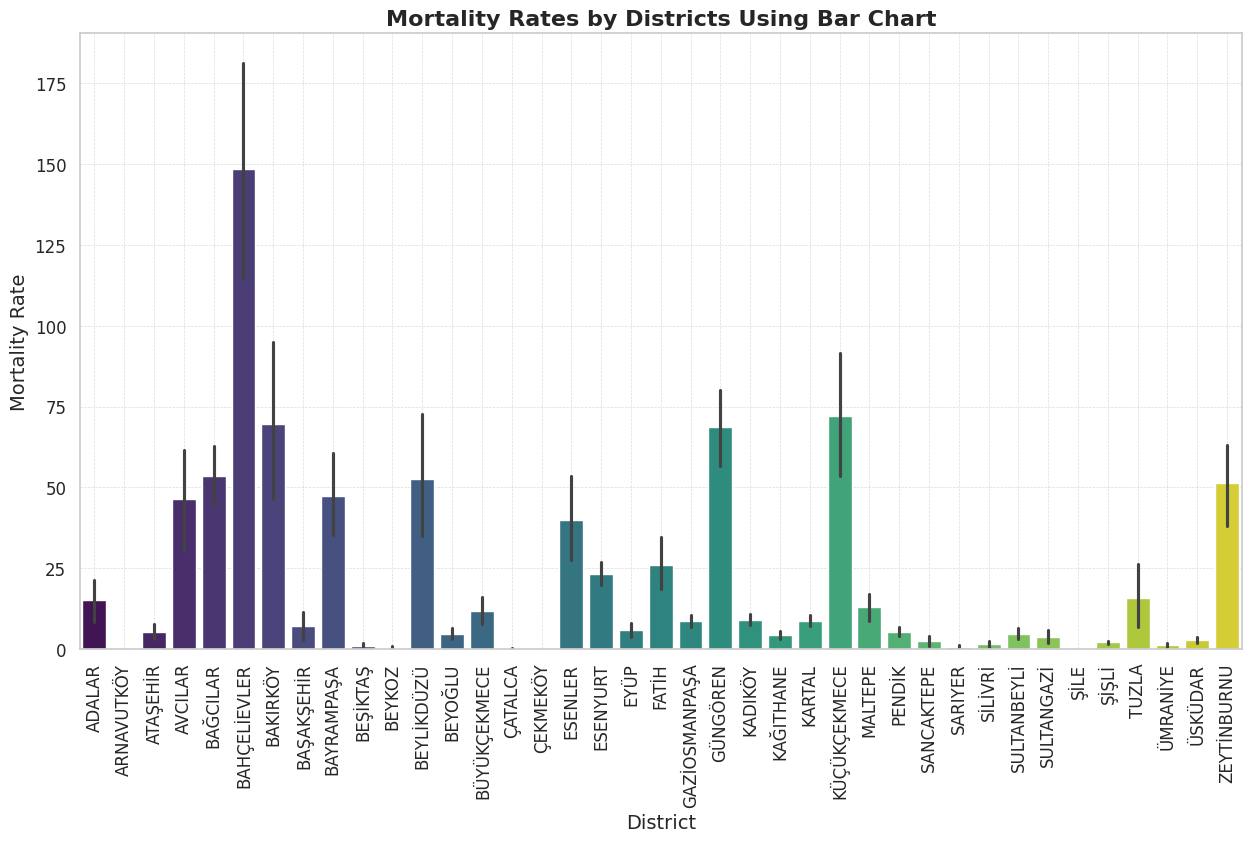

In [15]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(df['ilce_adi'].unique()))
plt.figure(figsize=(15, 8))
sns.barplot(x="ilce_adi", y="can_kaybi_sayisi", data=df, palette=palette)                         #Creating a bar chart visualizing mortality rates by district
plt.title("Mortality Rates by Districts Using Bar Chart", fontsize=16, fontweight='bold')
plt.xlabel("District", fontsize=14)
plt.ylabel("Mortality Rate", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

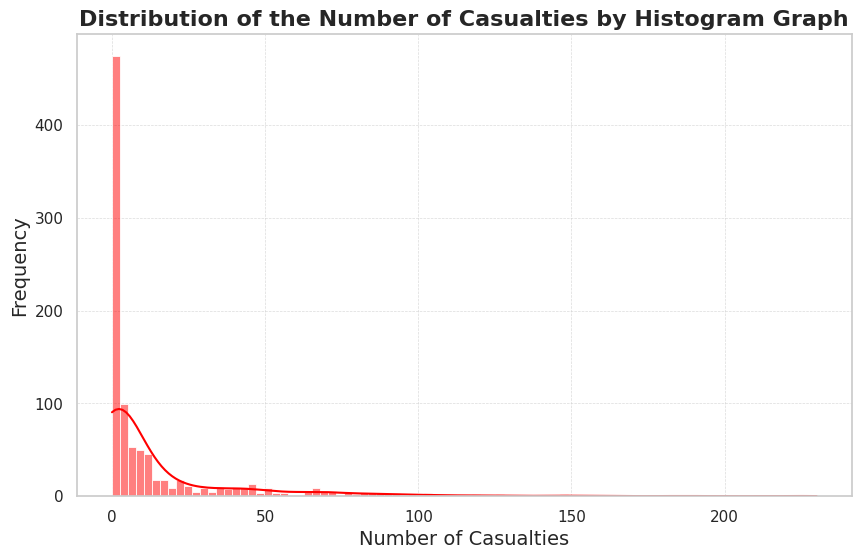

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df.can_kaybi_sayisi, kde = True, color='red')
plt.title("Distribution of the Number of Casualties by Histogram Graph", fontsize=16, fontweight='bold')
plt.xlabel("Number of Casualties", fontsize=14)                                 #Creates and displays a histogram chart visualizing the distribution of the number of casualties
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [17]:
df["can_kaybi_sayisi"].describe()  #Gives a statistical summary of the 'can_kaybi_sayisi' column

,can_kaybi_sayisi
count,959.000000
mean,14.749739
std,28.838763
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,230.000000


In [18]:
numeric_df = df.select_dtypes(include=[float, int])  #Selects numeric (float and int) columns in the data set

In [19]:
corr = numeric_df.corr()  #Calculates the correlation matrix between numeric columns

In [20]:
print(corr)  #Prints the correlation matrix on the screen

                              mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
mahalle_koy_uavt                      1.000000                     -0.219561   
cok_agir_hasarli_bina_sayisi         -0.219561                      1.000000   
agir_hasarli_bina_sayisi             -0.264787                      0.912125   
orta_hasarli_bina_sayisi             -0.308731                      0.763863   
hafif_hasarli_bina_sayisi            -0.367522                      0.592846   
can_kaybi_sayisi                     -0.177390                      0.831466   
agir_yarali_sayisi                   -0.173552                      0.865972   
hastanede_tedavi_sayisi              -0.190762                      0.834955   
hafif_yarali_sayisi                  -0.203439                      0.827963   
dogalgaz_boru_hasari                 -0.219315                      0.525448   
icme_suyu_boru_hasari                -0.226392                      0.539754   
atik_su_boru_hasari                  -0.

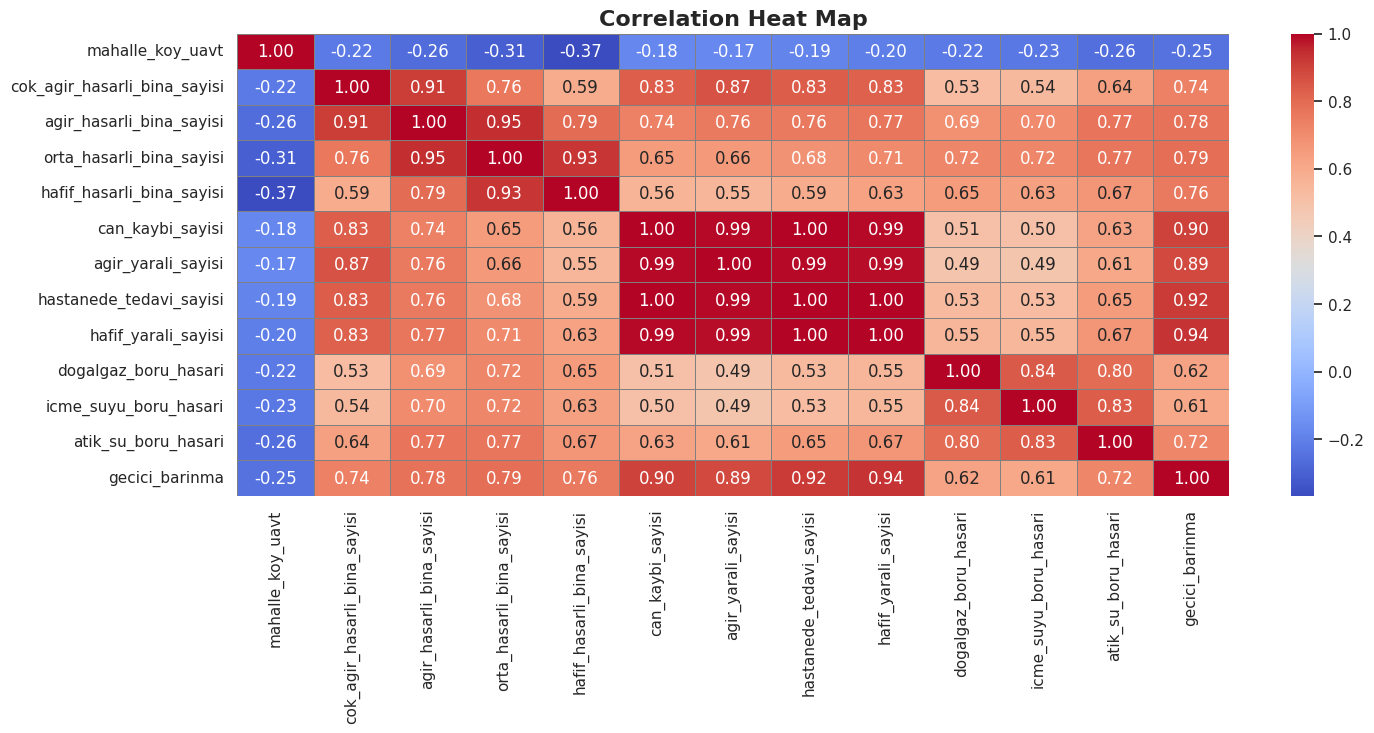

In [21]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')   #Generates and displays heat map visualizing correlations between numerical columns
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
plt.show()

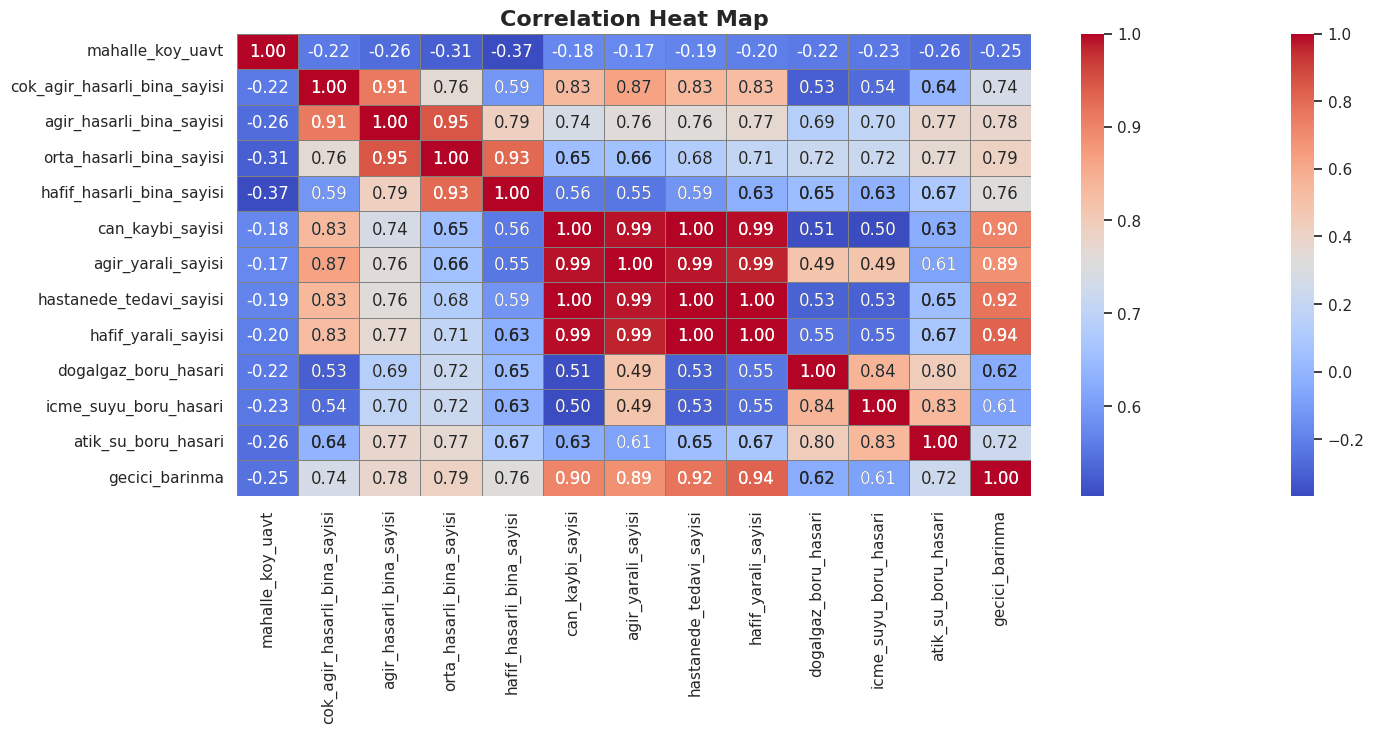

In [22]:
plt.figure(figsize=(16, 6))       #Creates and displays the heatmap hiding correlation values less than 0.5
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
mask = np.zeros_like(corr)
mask[np.abs(corr) < 0.5] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray', mask=mask)

plt.show()

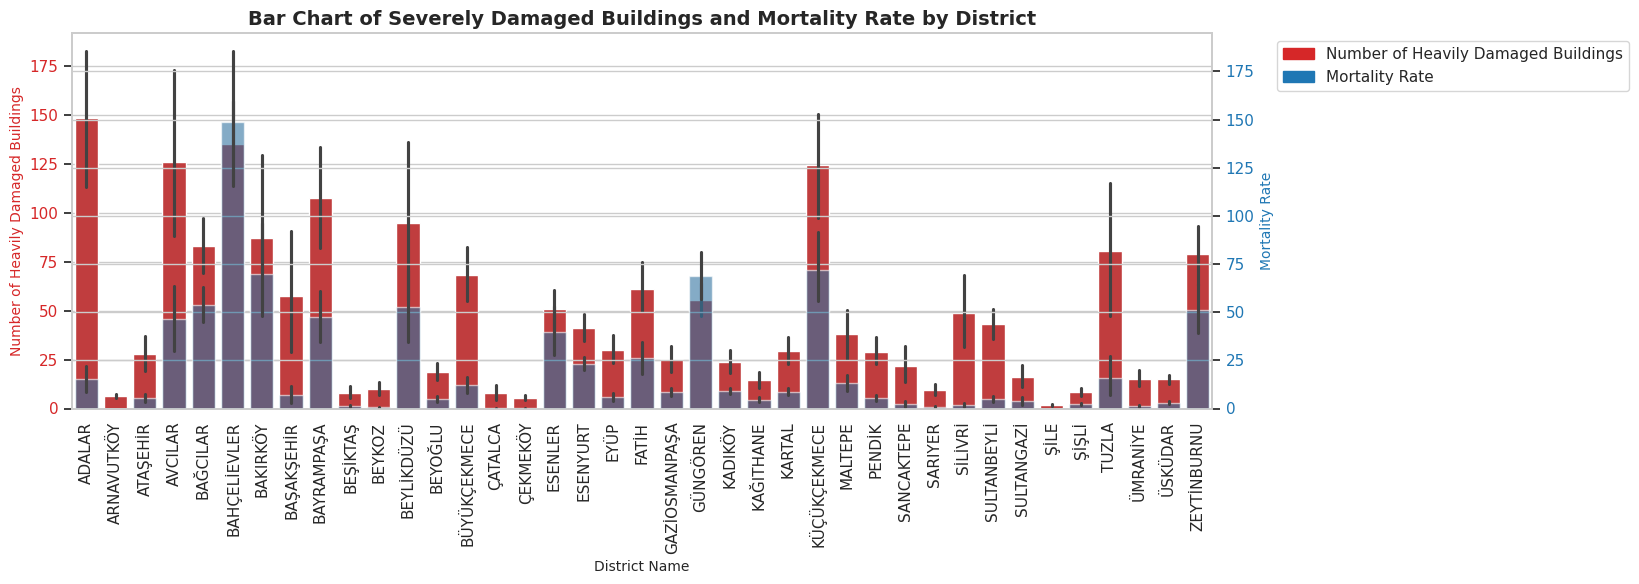

In [23]:
fig, ax1 = plt.subplots(figsize=(13, 6))

color = 'tab:red'
ax1.set_xlabel('District Name', fontsize=10)
ax1.set_ylabel('Number of Heavily Damaged Buildings', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='agir_hasarli_bina_sayisi', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
                                              #Constructs and displays a biaxial bar graph showing the number of severely damaged buildings and mortality rate by districts
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mortality Rate', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='can_kaybi_sayisi', data=df, ax=ax2, alpha=0.6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Bar Chart of Severely Damaged Buildings and Mortality Rate by District", fontsize=14, fontweight='bold')
fig.tight_layout()

red_patch = Patch(color='tab:red', label='Number of Heavily Damaged Buildings')
blue_patch = Patch(color='tab:blue', label='Mortality Rate')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

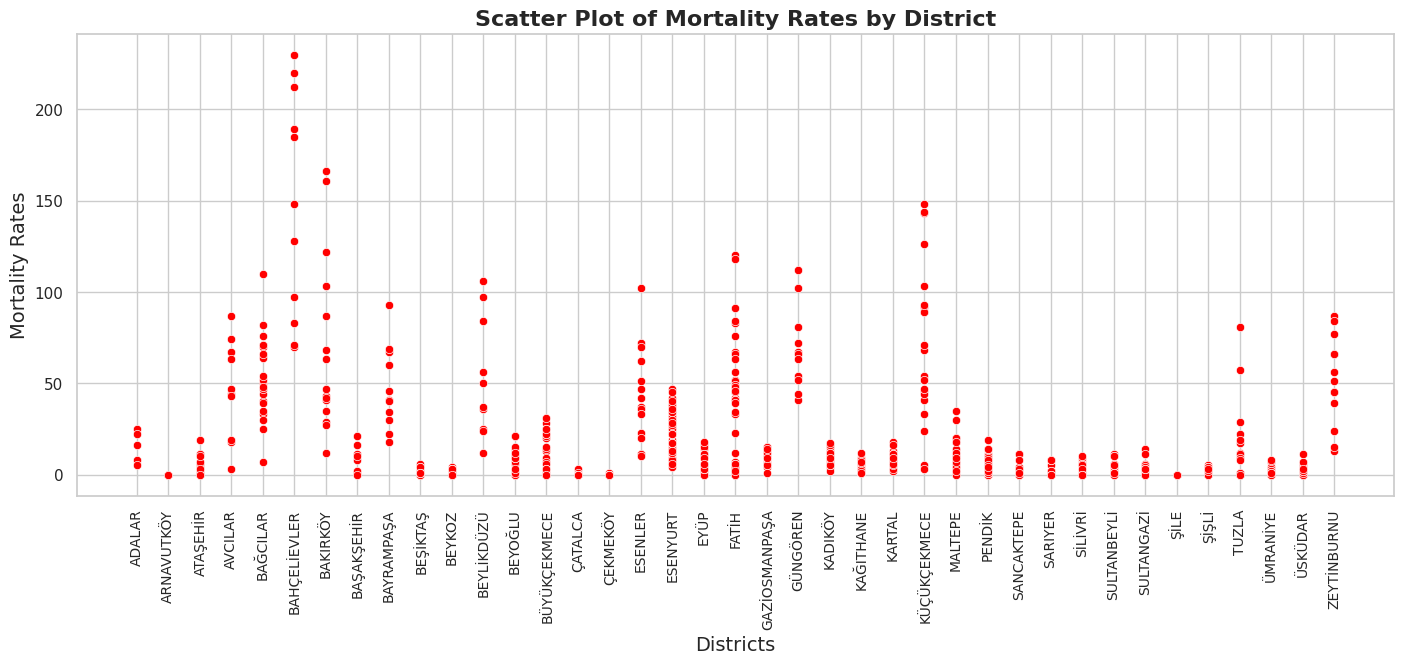

In [24]:
plt.figure(figsize=(17, 6))
sns.scatterplot(x="ilce_adi", y="can_kaybi_sayisi", color= "red", data=df)
plt.title("Scatter Plot of Mortality Rates by District", fontsize=16, fontweight= 'bold')
plt.xticks(rotation=90, fontsize=10)            #Creates and displays a scatter graph showing mortality rates by districts
plt.xlabel("Districts", fontsize=14)
plt.ylabel("Mortality Rates", fontsize=14)
plt.show()

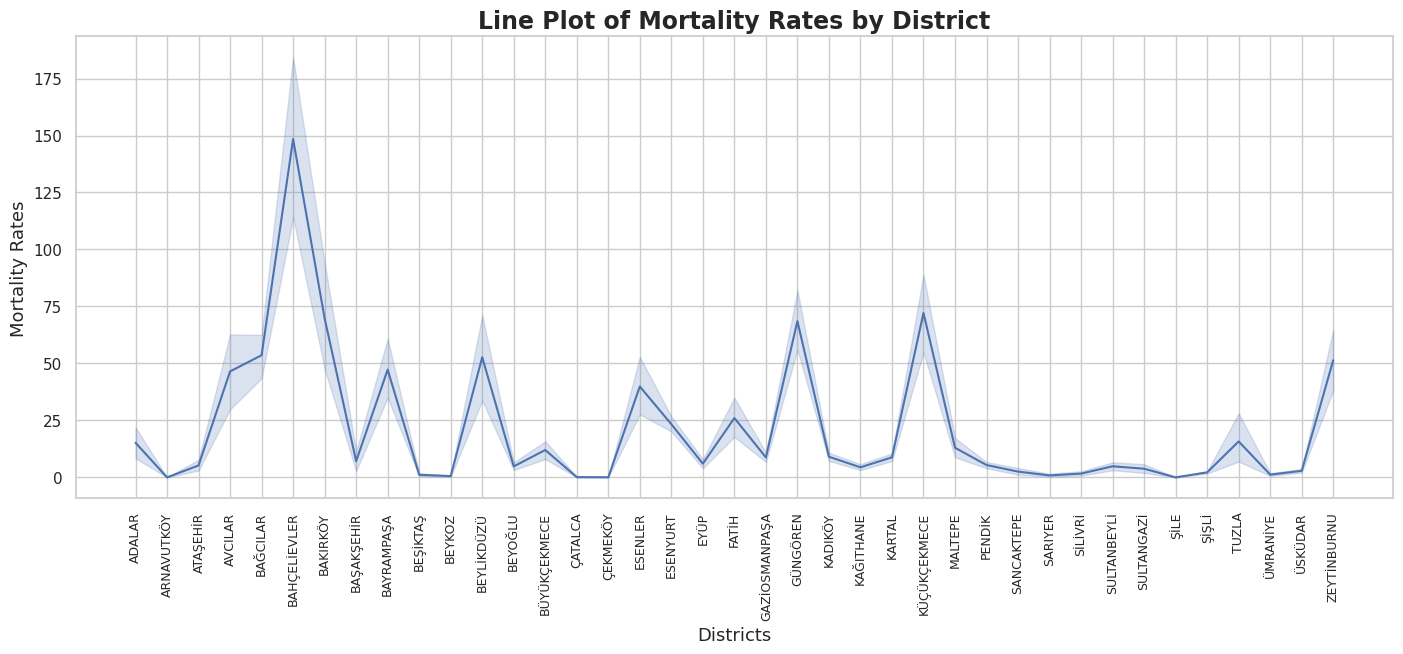

In [25]:
plt.figure(figsize=(17,6))
sns.lineplot(x= "ilce_adi", y= "can_kaybi_sayisi", data = df);
plt.title("Line Plot of Mortality Rates by District", fontsize= 17, fontweight= 'bold')
plt.xticks(rotation = 90, fontsize=9)   #Creates and displays a line graph showing mortality rates by districts
plt.xlabel("Districts", fontsize= 13)
plt.ylabel("Mortality Rates", fontsize=13)
plt.show()

In [52]:
y = df[["can_kaybi_sayisi"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["can_kaybi_sayisi", "mahalle_koy_uavt", "ilce_adi", "mahalle_adi"], axis=1)

In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)  #Splits features and target variables into 70% training and 30% testing

In [54]:
scaler = StandardScaler()      #Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
rf = RandomForestRegressor(n_estimators=300, random_state=11)  #Creates a 300-tree RandomForestRegressor model and uses a fixed randomness value to control randomness

In [44]:
model2 = rf.fit(x_train_scaled, y_train)    #Trains the RandomForestRegressor model with scaled training data

In [45]:
model2.score(x_test_scaled, y_test)   #Calculates the R² (determination) score of the model on test data and evaluates how well the model performs

0.9952491180749701

In [46]:
y_pred = rf.predict(x_test_scaled)  #Enables the model to make predictions by making predictions on test data

In [47]:
mse = mean_squared_error(y_test, y_pred)  #Calculate the mean squared error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  #Calculates the R² (determination) score of the model

print(f"RandomForestRegressor MSE: {mse}")  #Prints the mean squared error (MSE) value on the screen
print(f"RandomForestRegressor R^2 Score: {r2}")  #Prints the R² score on the screen

RandomForestRegressor MSE: 3.7364529320987634
RandomForestRegressor R^2 Score: 0.9952491180749701


In [48]:
feature_importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

#Calculates the features of the model in order of importance and shows the most important features in order of highest to lowest importance

                         Feature  Importance
5        hastanede_tedavi_sayisi    0.807413
6            hafif_yarali_sayisi    0.104678
4             agir_yarali_sayisi    0.081103
10                gecici_barinma    0.003573
3      hafif_hasarli_bina_sayisi    0.000883
1       agir_hasarli_bina_sayisi    0.000701
2       orta_hasarli_bina_sayisi    0.000524
0   cok_agir_hasarli_bina_sayisi    0.000447
9            atik_su_boru_hasari    0.000282
8          icme_suyu_boru_hasari    0.000229
7           dogalgaz_boru_hasari    0.000167


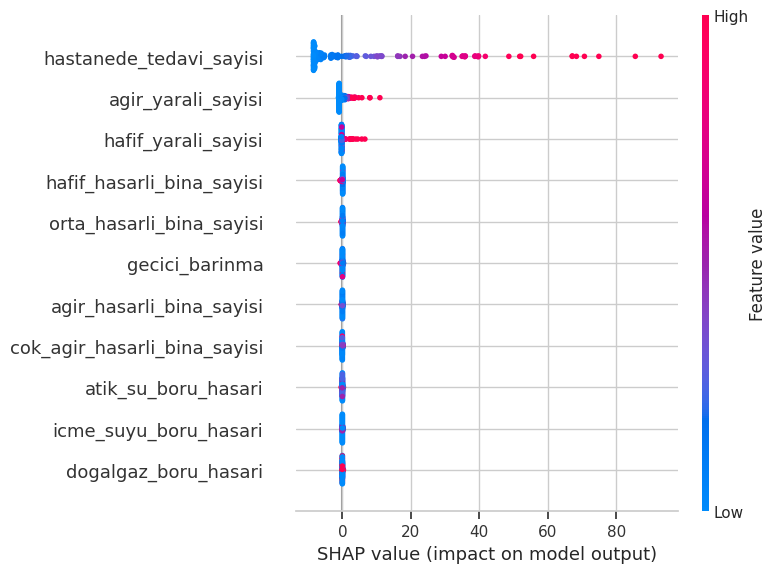

In [49]:
!pip install shap
import shap

# Define the target variable and features
target = 'can_kaybi_sayisi'
features = df.columns.difference([target, 'ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt'])

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the feature importance
shap.summary_plot(shap_values, X_test)

In [50]:
lr = LinearRegression()  #Builds a simple linear regression model

In [55]:
model = lr.fit(x_train_scaled, y_train)  #Trains the LinearRegression model with scaled training data

In [56]:
model.score(x_test_scaled,y_test)   #Calculate the R² (determination) score of the model on test data and evaluate the performance of the model

0.9992675266296105

In [57]:
model.score(x_train_scaled, y_train)  #Calculates the R² (stability) score of the model on training data, evaluates the performance of the model on training data and examines the case of overlearning

0.9994249677543271

In [58]:
y_pred = lr.predict(x_test_scaled)  #Produces model predictions by making predictions on test data

In [59]:
mse = mean_squared_error(y_test, y_pred)  #Calculate the mean squared error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  #Calculates the R² (determination) score of the model

print(f"LinearRegression MSE: {mse}")  #Prints the mean squared error (MSE) value on the screen
print(f"LinearRegression R^2 Score: {r2}")  #Prints the R² score on the screen

LinearRegression MSE: 0.576072467315381
LinearRegression R^2 Score: 0.9992675266296105


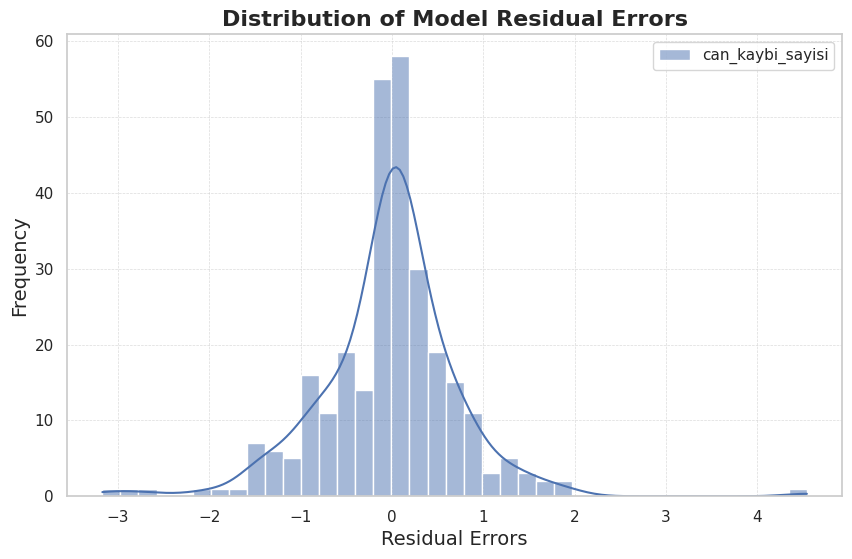

In [60]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Model Residual Errors', fontsize=16, fontweight='bold')
plt.xlabel('Residual Errors', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

#This graph shows the distribution and frequency of differences (residual errors) between model predicted values and actual values

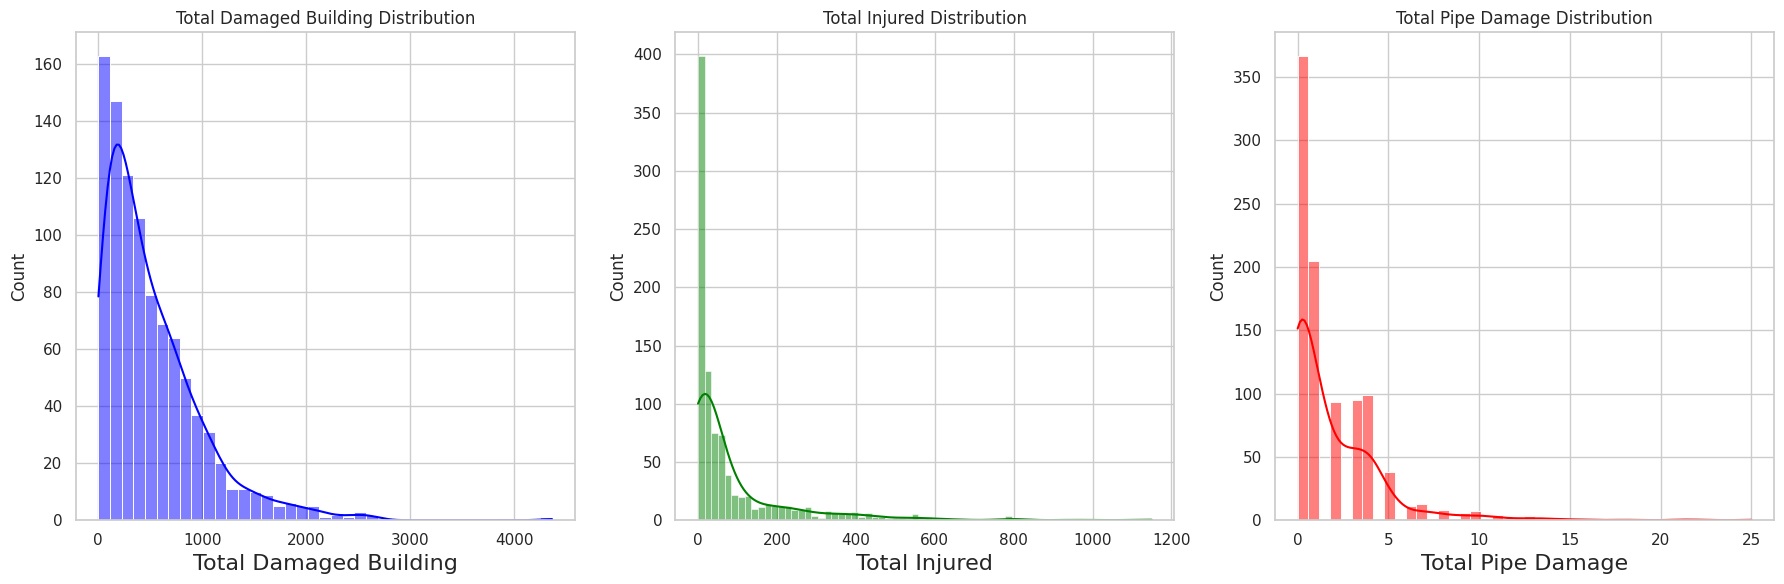

In [61]:
df['toplam_hasarli_bina'] = df['cok_agir_hasarli_bina_sayisi'] + df['agir_hasarli_bina_sayisi'] + df['orta_hasarli_bina_sayisi'] + df['hafif_hasarli_bina_sayisi']
df['toplam_yarali'] = df['agir_yarali_sayisi'] + df['hafif_yarali_sayisi']
df['toplam_boru_hasari'] = df['dogalgaz_boru_hasari'] + df['icme_suyu_boru_hasari'] + df['atik_su_boru_hasari']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['toplam_hasarli_bina'], kde=True, color='blue')
plt.xlabel("Total Damaged Building", fontsize= 16)
plt.title('Total Damaged Building Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['toplam_yarali'], kde=True, color='green')
plt.xlabel("Total Injured", fontsize= 16)
plt.title('Total Injured Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['toplam_boru_hasari'], kde=True, color='red')
plt.xlabel("Total Pipe Damage", fontsize= 16)
plt.title('Total Pipe Damage Distribution')

plt.tight_layout()
plt.show()

#Creates and displays three histogram plots showing the distribution of total damaged buildings, total injured and total pipe damage

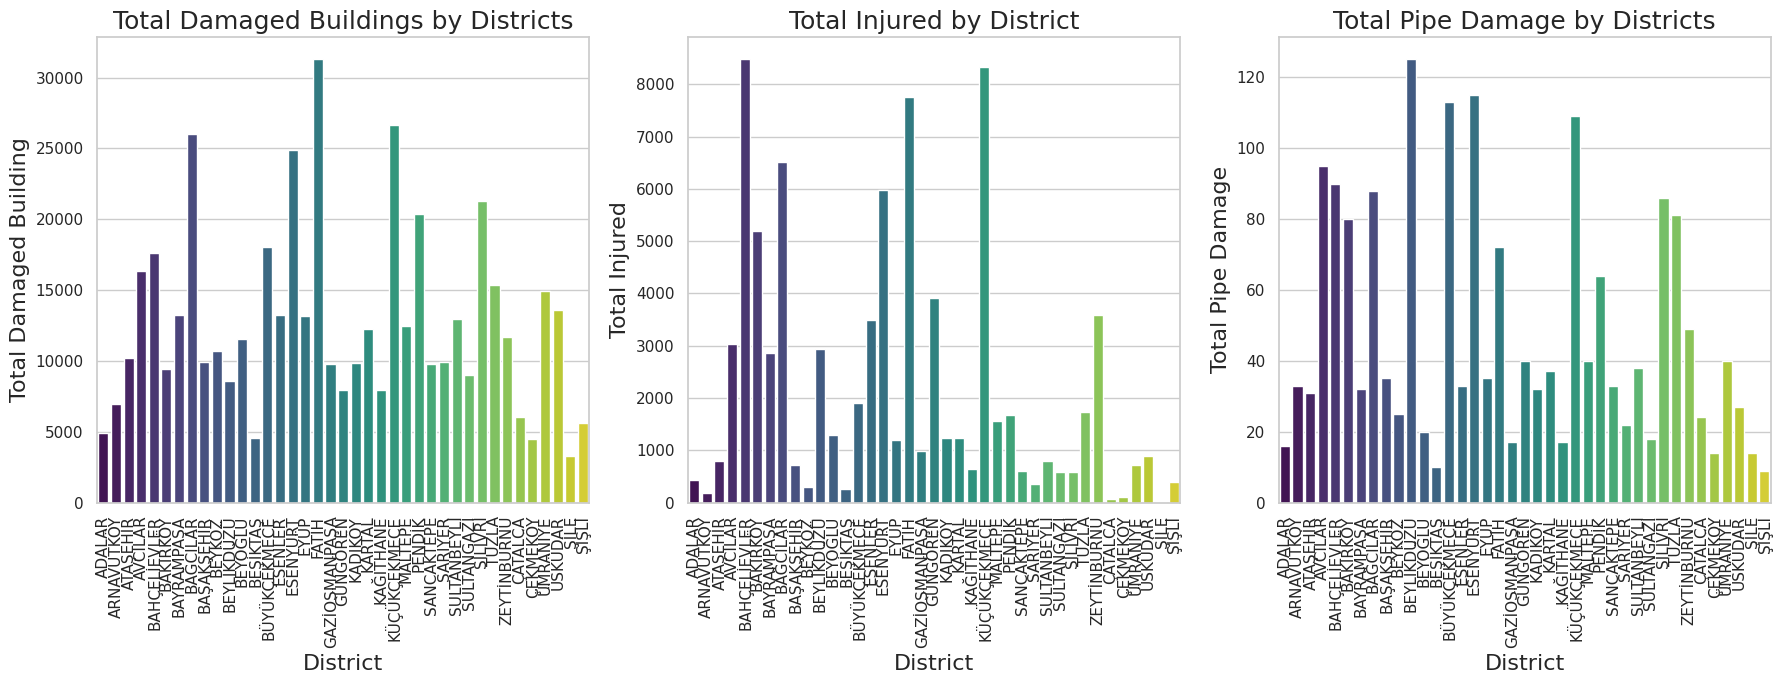

In [62]:
df_grouped = df.groupby('ilce_adi').agg({
    'toplam_hasarli_bina': 'sum',
    'toplam_yarali': 'sum',
    'toplam_boru_hasari': 'sum'
}).reset_index()

plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='ilce_adi', y='toplam_hasarli_bina', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Damaged Building", fontsize=16)
plt.title('Total Damaged Buildings by Districts', fontsize=18)

plt.subplot(1, 3, 2)
sns.barplot(x='ilce_adi', y='toplam_yarali', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Injured", fontsize=16)
plt.title('Total Injured by District', fontsize=18)

plt.subplot(1, 3, 3)
sns.barplot(x='ilce_adi', y='toplam_boru_hasari', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Pipe Damage", fontsize=16)
plt.title('Total Pipe Damage by Districts', fontsize=18)

plt.tight_layout()
plt.show()

#Creates and displays three bar charts showing total damaged buildings, total injured and total pipe damage by district

In [63]:
import geopandas as gpd
import folium
from folium import Choropleth

# Geographic data set loading
geo_data_url = 'https://raw.githubusercontent.com/ozanyerli/istanbul-districts-geojson/main/istanbul-districts.json'
geo_data = gpd.read_file(geo_data_url)
# Upload IBB data
ib_data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")
ib_data['risk_seviyesi'] = ib_data['can_kaybi_sayisi']

# Combining GeoDataFrame with Pandas DataFrame
geo_data = geo_data.merge(ib_data, left_on='name', right_on='ilce_adi')

# Create the map
m = folium.Map(location=[41.0082, 28.9784], zoom_start=11)

# Showing risk levels on a map
Choropleth(
    geo_data=geo_data,
    data=geo_data,
    columns=['ilce_adi', 'risk_seviyesi'],
    key_on='feature.properties.ilce_adi',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Risk Seviyesi'
).add_to(m)

# Show map
m.save('/content/istanbul_risk_haritasi.html')

!ls /content

deprem.csv  istanbul_risk_haritasi.html  sample_data


In [64]:
from folium import Html

# Create HTML with the map
html = Html("""<iframe src="/content/istanbul_risk_haritasi.html" width="800" height="600"></iframe>""", script=True)

# Add HTML to the map
m.add_child(html)

# Display the map (might not render perfectly)
m
